Importé librerias

In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d
from scipy.signal import medfilt
import os
import glob
import pandas as pd

Cree un grafico de señal de audio con **[LIBROSA](https://librosa.org/doc/latest/generated/librosa.load.html)**

In [3]:
audio_path = '../databases_morsecode/arrl-org/arrl-2013/2013-15/130109_15WPM.mp3'

wave_type, sample_rate = librosa.load(audio_path)

duration = len(wave_type) / sample_rate

time = np.linspace(0, duration, num=len(wave_type))


In [4]:

(time.shape)

(8978112,)

- Grafique las señales de audio

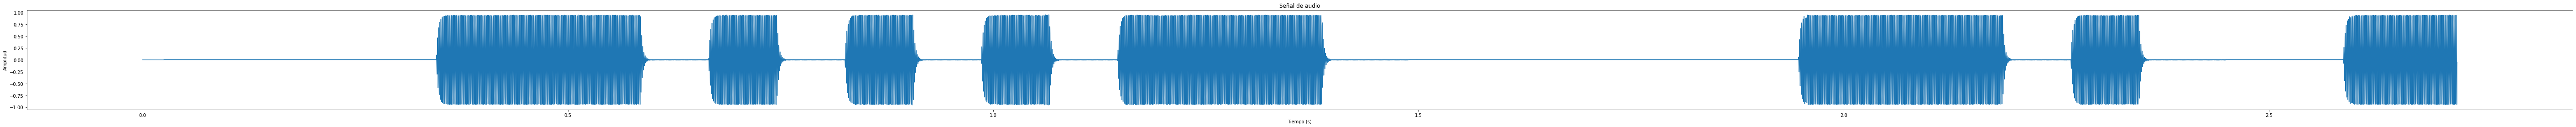

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 4))
plt.plot(time[:60000], wave_type[:60000])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de audio')
plt.show()

### Normalice los datos entre 1 y 0

In [6]:
import numpy as np

normalized_data = (time - np.min(time)) / (np.max(time) - np.min(time))

print(normalized_data.min())

0.0


- Grafico de toda la muestra con datos normalizados

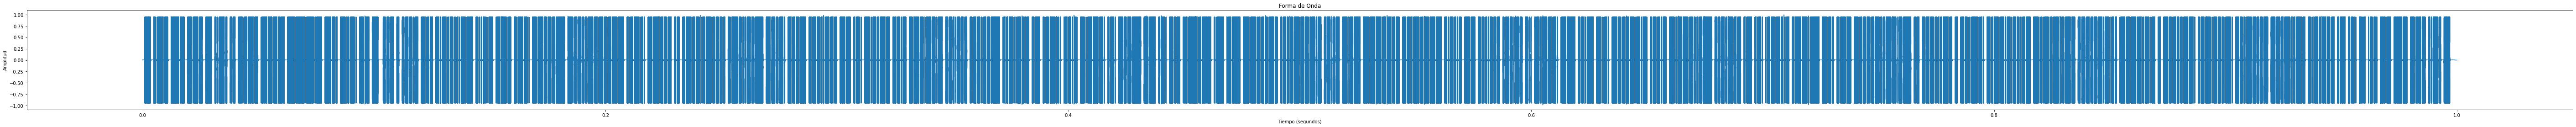

In [9]:
plt.figure(figsize=(100, 4))
plt.plot(normalized_data, wave_type)
plt.title('Forma de Onda')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.show()

- Busque la energia de la señales

In [10]:

interval_duration = 0.1 

interval_samples = int(interval_duration * sample_rate)

total_intervals = len(wave_type) // interval_samples

energies = []
for i in range(total_intervals):
    start = i * interval_samples
    end = (i + 1) * interval_samples
    interval_wave_type = wave_type[start:end]
    energy = sum(interval_wave_type**2)
    energies.append(energy)

print(energies[:3])

[0.022419276772496784, 0.029901305850216886, 0.029901306378633308]


- Grafico de energia de señal

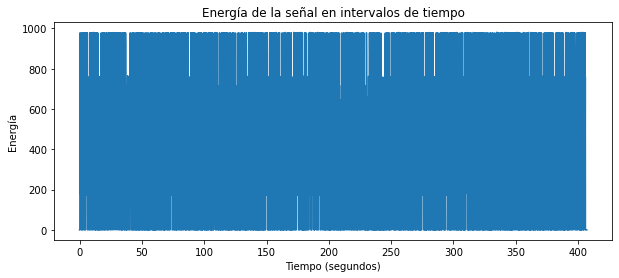

In [ ]:
time = np.arange(total_intervals) * interval_duration

plt.figure(figsize=(10, 4))
plt.plot(time, energies)
plt.title('Energía de la señal en intervalos de tiempo')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Energía')
plt.show()

- Hice un convertidor de array(donde estaba la energia de la señal) a binario 


In [ ]:

threshold = 0.1 

is_active = [energy > threshold for energy in energies]

on_off = []

for i, active in enumerate(is_active):
    if active:
        on_off.append(1)
    else:
        on_off.append(0)
        
on_off = np.array(on_off)


- Grafico de array en binario

[0 0 0 ... 0 0 0]


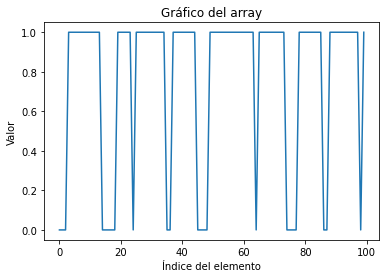

In [ ]:
plt.plot(on_off[:100])

print(on_off)

plt.xlabel('Índice del elemento')
plt.ylabel('Valor')
plt.title('Gráfico del array')

plt.show()